In [20]:
import utils
import numpy as np
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
X, Y, index = utils.load_data("data/labels/lcwaikiki100k_labels.csv", resize = (300, 400))

100%|██████████| 99991/99991 [00:00<00:00, 852269.92it/s]


In [3]:
"""
Categories:
["Erkek Bebek","Sweatshirt"]
["Kız Çocuk","Hırka ve Kazak"]
["Kadın","Elbise"]
["Erkek","Sweatshirt"]
["Erkek","Ayakkabı ve Terlik"]
["Kız Çocuk","Gömlek, Bluz ve Tunik"]
["Erkek","Chino Pantolon"]
["Kadın","Jean"]
["Genç Kız","İç Giyim ve Pijama"]
["Kız Çocuk","Hırka ve Kazak"]
["Kadın","Tişört, Body ve Atlet"]
["Kız Bebek","Ayakkabı ve Terlik"]
["Kadın","Spor Giyim"]
["Kadın","Tişört, Body ve Atlet"]
["Kadın","Gömlek ve Bluz"]
["Erkek","Aksesuar"]
"""

'\nCategories:\n["Erkek Bebek","Sweatshirt"]\n["Kız Çocuk","Hırka ve Kazak"]\n["Kadın","Elbise"]\n["Erkek","Sweatshirt"]\n["Erkek","Ayakkabı ve Terlik"]\n["Kız Çocuk","Gömlek, Bluz ve Tunik"]\n["Erkek","Chino Pantolon"]\n["Kadın","Jean"]\n["Genç Kız","İç Giyim ve Pijama"]\n["Kız Çocuk","Hırka ve Kazak"]\n["Kadın","Tişört, Body ve Atlet"]\n["Kız Bebek","Ayakkabı ve Terlik"]\n["Kadın","Spor Giyim"]\n["Kadın","Tişört, Body ve Atlet"]\n["Kadın","Gömlek ve Bluz"]\n["Erkek","Aksesuar"]\n'

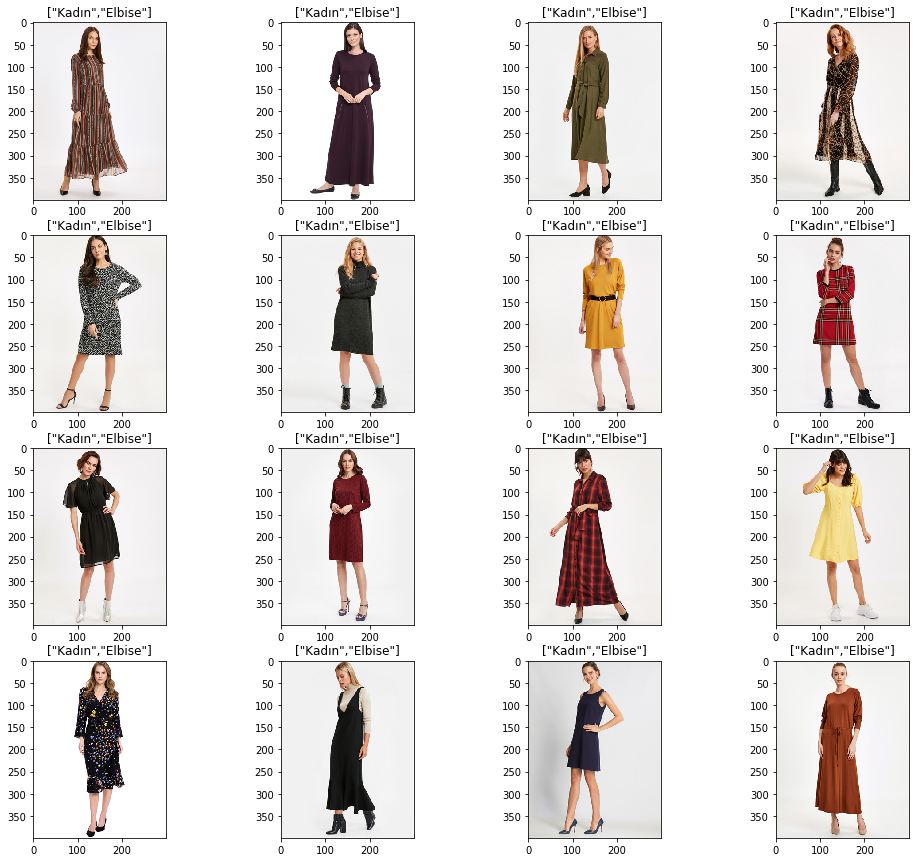

In [16]:
# Plot exmaple images
def plot(x, y, index, cat = None):        
    if cat:
        assert cat in index.values(), "Category %s should be in provided index"%cat
    fig, axes = plt.subplots(4, 4, figsize = (17, 15))
    axes= axes.flatten()
    i = 0
    ai = 0
    while ai < len(axes):
        if cat:
            if not index[Y[i]] == cat:
                i += 1
                continue

        axes[ai].imshow(X[i])
        axes[ai].set_title("%s"%index[Y[i]])
        # print(index[Y[i]])
        ai += 1
        i += 1
    plt.show()
    
plot(X, Y, index, cat = '["Kadın","Elbise"]')

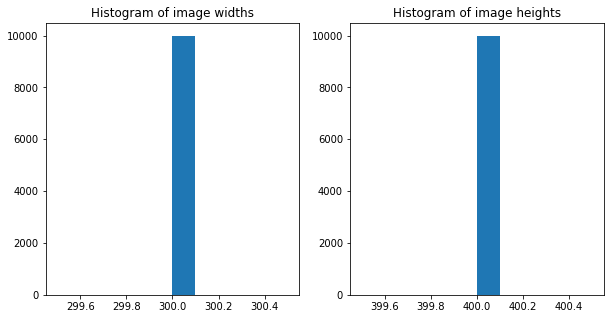

In [10]:
# Check how big images are in general - also how variable image shape is
widths = list(map(lambda x: x.shape[1], X))
heights = list(map(lambda x: x.shape[0], X))

_, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(widths)
axes[0].set_title("Histogram of image widths")
axes[1].hist(heights)
axes[1].set_title("Histogram of image heights")
plt.show()

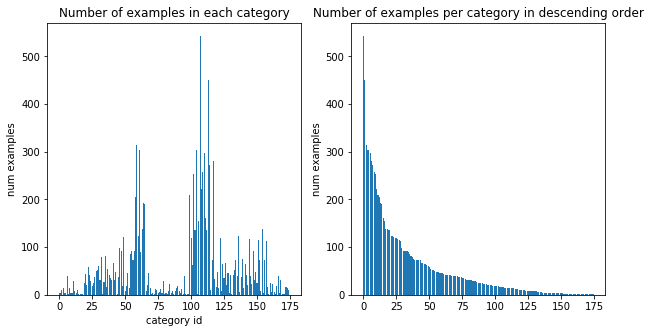

In [34]:
# Check distribution of classes
classes, counts = np.unique(Y, return_counts = True)
_, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].bar(classes, counts)
axes[0].set_title("Number of examples in each category")
axes[0].set_xlabel("category id")
axes[0].set_ylabel("num examples")
axes[1].bar(np.arange(len(classes)), np.sort(counts)[::-1])
axes[1].set_title("Number of examples per category in descending order")
axes[1].set_ylabel("num examples")
plt.show()